# COVID-19 STAGES PREDICT PROJECT

### Import libraries

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import seaborn as sns
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


### Get data

In [ ]:
data = pd.read_csv('data.csv', index_col='idx')
data.head()

0.02       0.1      0.5        1        5       5n       compound  \
idx                                                                           
5427 -0.285926 -0.947896 -26.2008 -81.7494 -0.01428 -0.01542  Blood, C-0128   
5428 -0.010077 -0.674457 -20.4881 -54.8019 -0.00754 -0.00963  Blood, C-0128   
5429 -0.026274 -0.059707  -1.6257 -39.2863 -0.00547 -0.00988  Blood, C-0128   
5430 -0.085608 -0.551574 -13.3227  -2.9634 -0.00432 -0.00972  Blood, C-0128   
5431 -0.079892 -0.519043  -1.1156 -23.2391 -0.00366 -0.00950  Blood, C-0128   

      severity  
idx             
5427       3.0  
5428       3.0  
5429       3.0  
5430       3.0  
5431       3.0

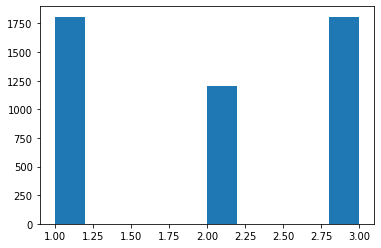

--classes--
1:  1809
2:  1206
3:  1809


In [ ]:
plt.hist(data['severity'])
plt.show()

print('--classes--')
print('1: ', len(data[data['severity'] == 1]))
print('2: ', len(data[data['severity'] == 2]))
print('3: ', len(data[data['severity'] == 3]))

In [ ]:
X = data.drop(['compound', 'severity'], axis=1)
y = data['severity']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
print('Train: ', len(X_train))
print('Test:  ', len(X_test))

Train:  4341
Test:   483


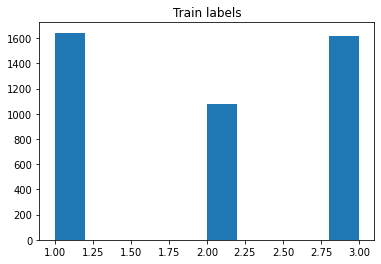

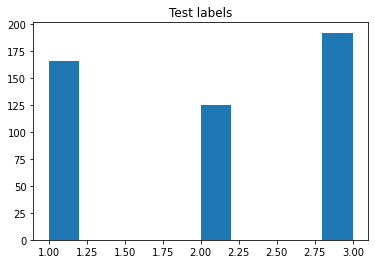

In [ ]:
plt.hist(y_train)
plt.title('Train labels')
plt.show()
plt.hist(y_test)
plt.title('Test labels')
plt.show()

### Predicting on CatBoost

In [ ]:
model1 = CatBoostClassifier(iterations=20000, random_state=42, depth=7,learning_rate=1e-2, use_best_model=True)

In [ ]:
model1.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=250, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0947568	test: 1.0951281	best: 1.0951281 (0)	total: 67.7ms	remaining: 22m 33s
250:	learn: 0.7478025	test: 0.7742837	best: 0.7742837 (250)	total: 2.61s	remaining: 3m 25s
500:	learn: 0.6448941	test: 0.6845539	best: 0.6845539 (500)	total: 5.14s	remaining: 3m 20s
750:	learn: 0.5821818	test: 0.6340280	best: 0.6340280 (750)	total: 7.66s	remaining: 3m 16s
1000:	learn: 0.5345208	test: 0.5995224	best: 0.5995224 (1000)	total: 10.2s	remaining: 3m 14s
1250:	learn: 0.4954012	test: 0.5738459	best: 0.5738459 (1250)	total: 12.9s	remaining: 3m 12s
1500:	learn: 0.4626528	test: 0.5531734	best: 0.5531734 (1500)	total: 15.7s	remaining: 3m 13s
1750:	learn: 0.4351189	test: 0.5371124	best: 0.5371124 (1750)	total: 18.4s	remaining: 3m 12s
2000:	learn: 0.4112241	test: 0.5238016	best: 0.5238016 (2000)	total: 21.4s	remaining: 3m 12s
2250:	learn: 0.3895722	test: 0.5116876	best: 0.5116876 (2250)	total: 24.3s	remaining: 3m 11s
2500:	learn: 0.3709351	test: 0.5014968	best: 0.5014968 (2500)	total: 27.4s	remai

Predicting:

In [ ]:
y_pred = model1.predict(X_test)

Precision: 0.8794
Recall: 0.8715
F1-measure: 0.8748
Accuracy: 0.8737
              precision    recall  f1-score   support

         1.0       0.85      0.89      0.87       166
         2.0       0.92      0.85      0.88       125
         3.0       0.87      0.88      0.87       192

    accuracy                           0.87       483
   macro avg       0.88      0.87      0.87       483
weighted avg       0.88      0.87      0.87       483



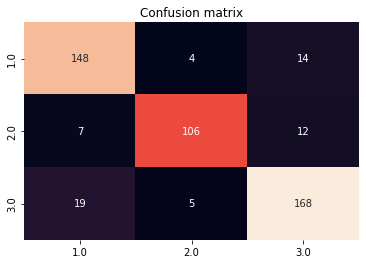

In [ ]:
print("Precision: {0:6.4f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {0:6.4f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1-measure: {0:6.4f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:6.4f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
labels = model1.classes_
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

Save model:

In [ ]:
model1.save_model('covid_stage_model')

### Predict on XGBoost

In [ ]:
model2 = XGBClassifier(n_estimators=20000, max_depth=7, booster='gbtree', n_jobs=-1, learning_rate=1e-2)

In [ ]:
model2.fit(X=X_train, y=y_train)

XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=20000, n_jobs=-1,
              objective='multi:softprob')

In [ ]:
y_pred = model2.predict(X_test)

Precision: 0.8007
Recall: 0.8022
F1-measure: 0.8008
Accuracy: 0.8054
              precision    recall  f1-score   support

         1.0       0.87      0.80      0.83       187
         2.0       0.75      0.78      0.76       117
         3.0       0.78      0.83      0.80       179

   micro avg       0.81      0.81      0.81       483
   macro avg       0.80      0.80      0.80       483
weighted avg       0.81      0.81      0.81       483



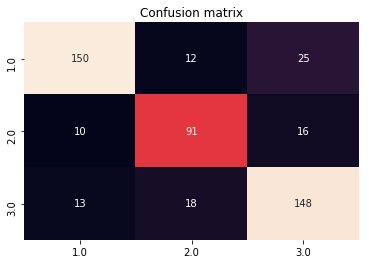

In [ ]:
print("Precision: {0:6.4f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {0:6.4f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1-measure: {0:6.4f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:6.4f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
labels = model2.classes_
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [ ]:
model2.save_model('covid_stage_xgb')

### Predicting on LightGBM

In [ ]:
model3 = LGBMClassifier(n_estimators=20000, num_leaves=10, max_depth=7, boosting_type='dart', learning_rate=1e-2)

In [ ]:
model3.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=7,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20000, n_jobs=-1, num_leaves=10, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = model3.predict(X_test)

Precision: 0.8376
Recall: 0.8370
F1-measure: 0.8373
Accuracy: 0.8385
              precision    recall  f1-score   support

         1.0       0.83      0.82      0.83       162
         2.0       0.84      0.84      0.84       116
         3.0       0.85      0.85      0.85       205

   micro avg       0.84      0.84      0.84       483
   macro avg       0.84      0.84      0.84       483
weighted avg       0.84      0.84      0.84       483



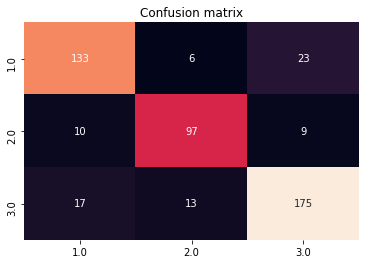

In [ ]:
print("Precision: {0:6.4f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {0:6.4f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1-measure: {0:6.4f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:6.4f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
labels = model1.classes_
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()